In [7]:
# import necessary libraries and specify that graphs should be plotted inline
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
# import the dataset into a Pandas dataframe
housing_dataset = pd.read_csv("Housing.csv")

# 1. Dataset Introduction
#### The dataset we've chosen and uploaded, "housing_dataset", has 13 features and 545 observations. We will be using the price column as the dependent variable, and the other 12 as dependent variables. As a refresher, we've added the name of all 13 variables, a brief description of each variable, and the data type of each variable below.
- **Price**: Price of the home
- **Area**: Area of the home
- **Bedrooms**: Number of bedrooms
- **Bathrooms**: Number of bathrooms
- **Stories**: Number of stories
- **Mainroad**: Whether the home is connected to a main road or not
- **Guestroom**: Whether the home has a guest room or not
- **Basement**: Whether the home has a basement or not
- **Hotwaterheating**: Whether the home has hot water heating capabilities or not
- **Airconditioning**: Whether the home has airconditioning capabilities or not
- **Parking**: Number of parking spaces available
- **Prefarea**: Whether the home is in a preferred area or not
- **furnishingstatus**: The home's furnishing status



In [9]:
# all 13 variables with first 5 observations
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
print(housing_dataset["guestroom"].unique())

['no' 'yes']


In [11]:
# we will need to map "yes" and "no" values to "1" and "0"

# encode the "mainroad" column
housing_dataset['mainroad'] = housing_dataset['mainroad'].map({'yes': 1, 'no': 0})
# encode the "guestroom" column
housing_dataset['guestroom'] = housing_dataset['guestroom'].map({'yes': 1, 'no': 0})
# encode the "basement" column
housing_dataset['basement'] = housing_dataset['basement'].map({'yes': 1, 'no': 0})
# encode the "hotwaterheating" column
housing_dataset['hotwaterheating'] = housing_dataset['hotwaterheating'].map({'yes': 1, 'no': 0})
# encode the "airconditioning" column
housing_dataset['airconditioning'] = housing_dataset['airconditioning'].map({'yes': 1, 'no': 0})
# encode the "prefarea" column
housing_dataset['prefarea'] = housing_dataset['prefarea'].map({'yes': 1, 'no': 0})
# ordinally encode the "furnishingstatus" column
housing_dataset['furnishingstatus'] = housing_dataset['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})


In [12]:
# all columns are encoded properly now

housing_dataset.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


#### After encoding, 1 = yes, and 0 = no. For the "furnishingstatus" column, 0 = unfurnished, 1 = semi-furnished, 2 = furnished.

In [13]:
# summary statistics
display(housing_dataset.describe())

# presence of null values
housing_dataset.isna().sum()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### Based on these summary statistics, we can see that there are no null/outlier values, so we are good to proceed to the EDA.

# 2. Exploratory Data Analysis

#### The first visualizations we wanted to go over are bar charts for the binary and ordinal data. Separating the categorical values allows us to perform a more in-depth and organized analysis of the data.

In [14]:
# columns that are either yes or no only
binary_data = housing_dataset.iloc[:, [5, 6, 7, 8, 9, 11]]

# columns that contain ordinal data
ordinal_data = housing_dataset.iloc[:, [2, 3, 4, 10, 12]]

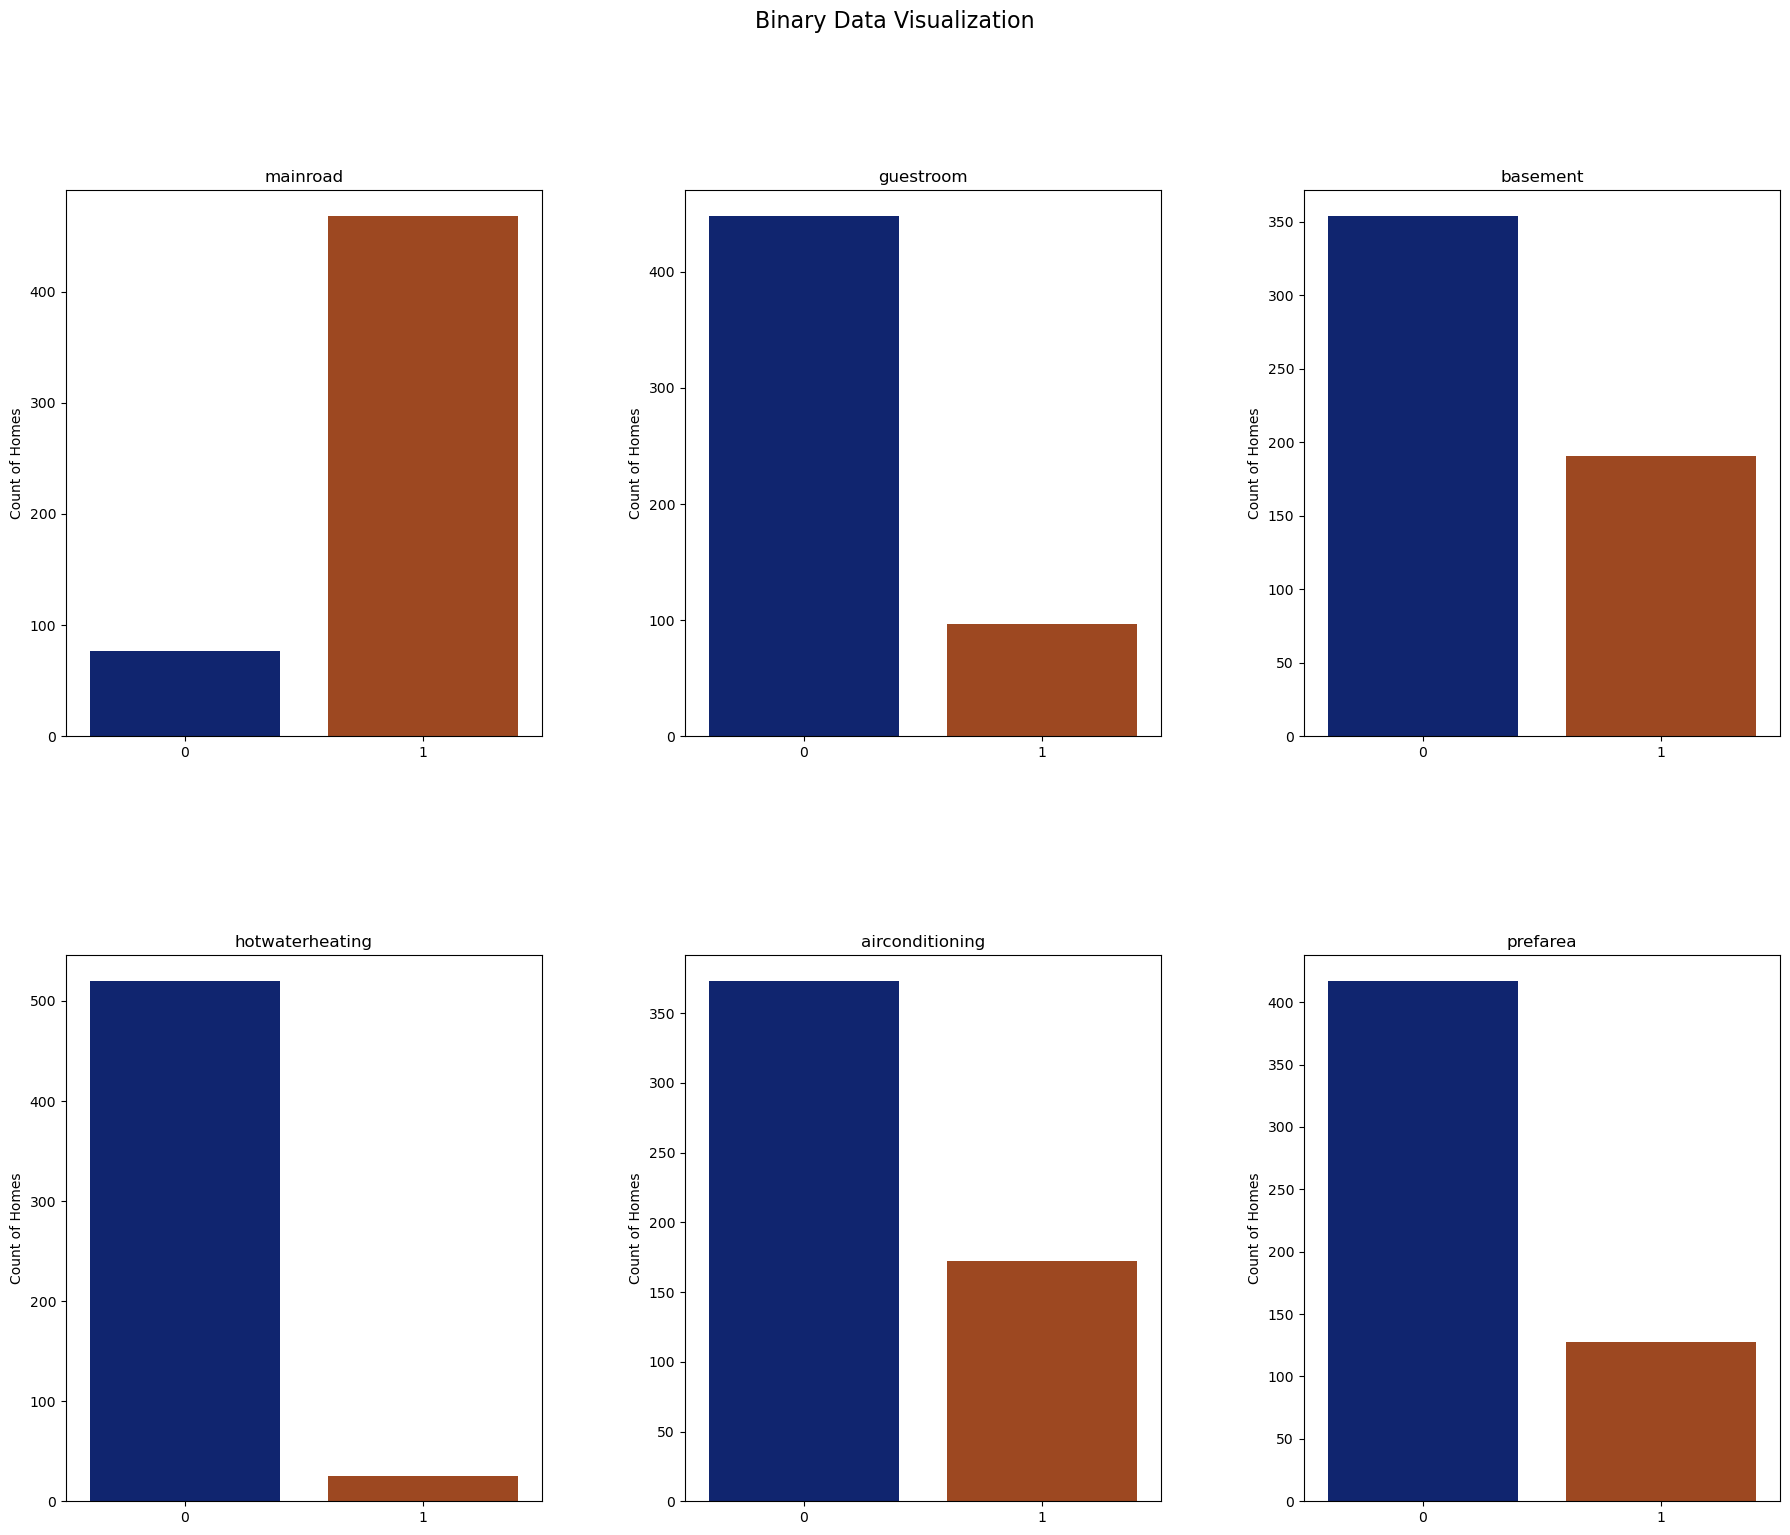

In [15]:
# binary data (data that has only yes (1) or no (1) as the values)

# determine the layout for subplots
n_cols = 3  # Set the number of columns to spread the charts horizontally
n_rows = (len(binary_data.columns) + n_cols - 1) // n_cols  # calculate number of rows needed

# create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 15))  # increase figure size for clarity
fig.suptitle('Binary Data Visualization', fontsize=16, y=1.02)

# flatten the axes array for easy iteration
axes = axes.flatten()

# loop through each selected column and plot in the grid
for i, column in enumerate(binary_data.columns):
    sns.countplot(data=housing_dataset, x=column, ax=axes[i], palette="dark")
    # set labels for each plot
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count of Homes')
    axes[i].set_title(column)

# remove any empty subplots if columns < n_cols * n_rows
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])  # delete unused axes

# adjust layout to prevent overlap and add space between plots
plt.tight_layout()
fig.subplots_adjust(top=0.9, hspace=0.4, wspace=0.3)  # adjust spacing between rows and columns
plt.show()

#### Based on the visualizations of the features that contain only yes/no values, we have come to the following conclusions:
 - Majority of the homes in this dataset do not have a basement or a guestroom
 - Majority of the homes lack appliances that we would generally consider necessities, such as hot water heating or air conditioning
 - Majority of the homes are not in a preferred area
 - Majority of the homes are connected to the main road

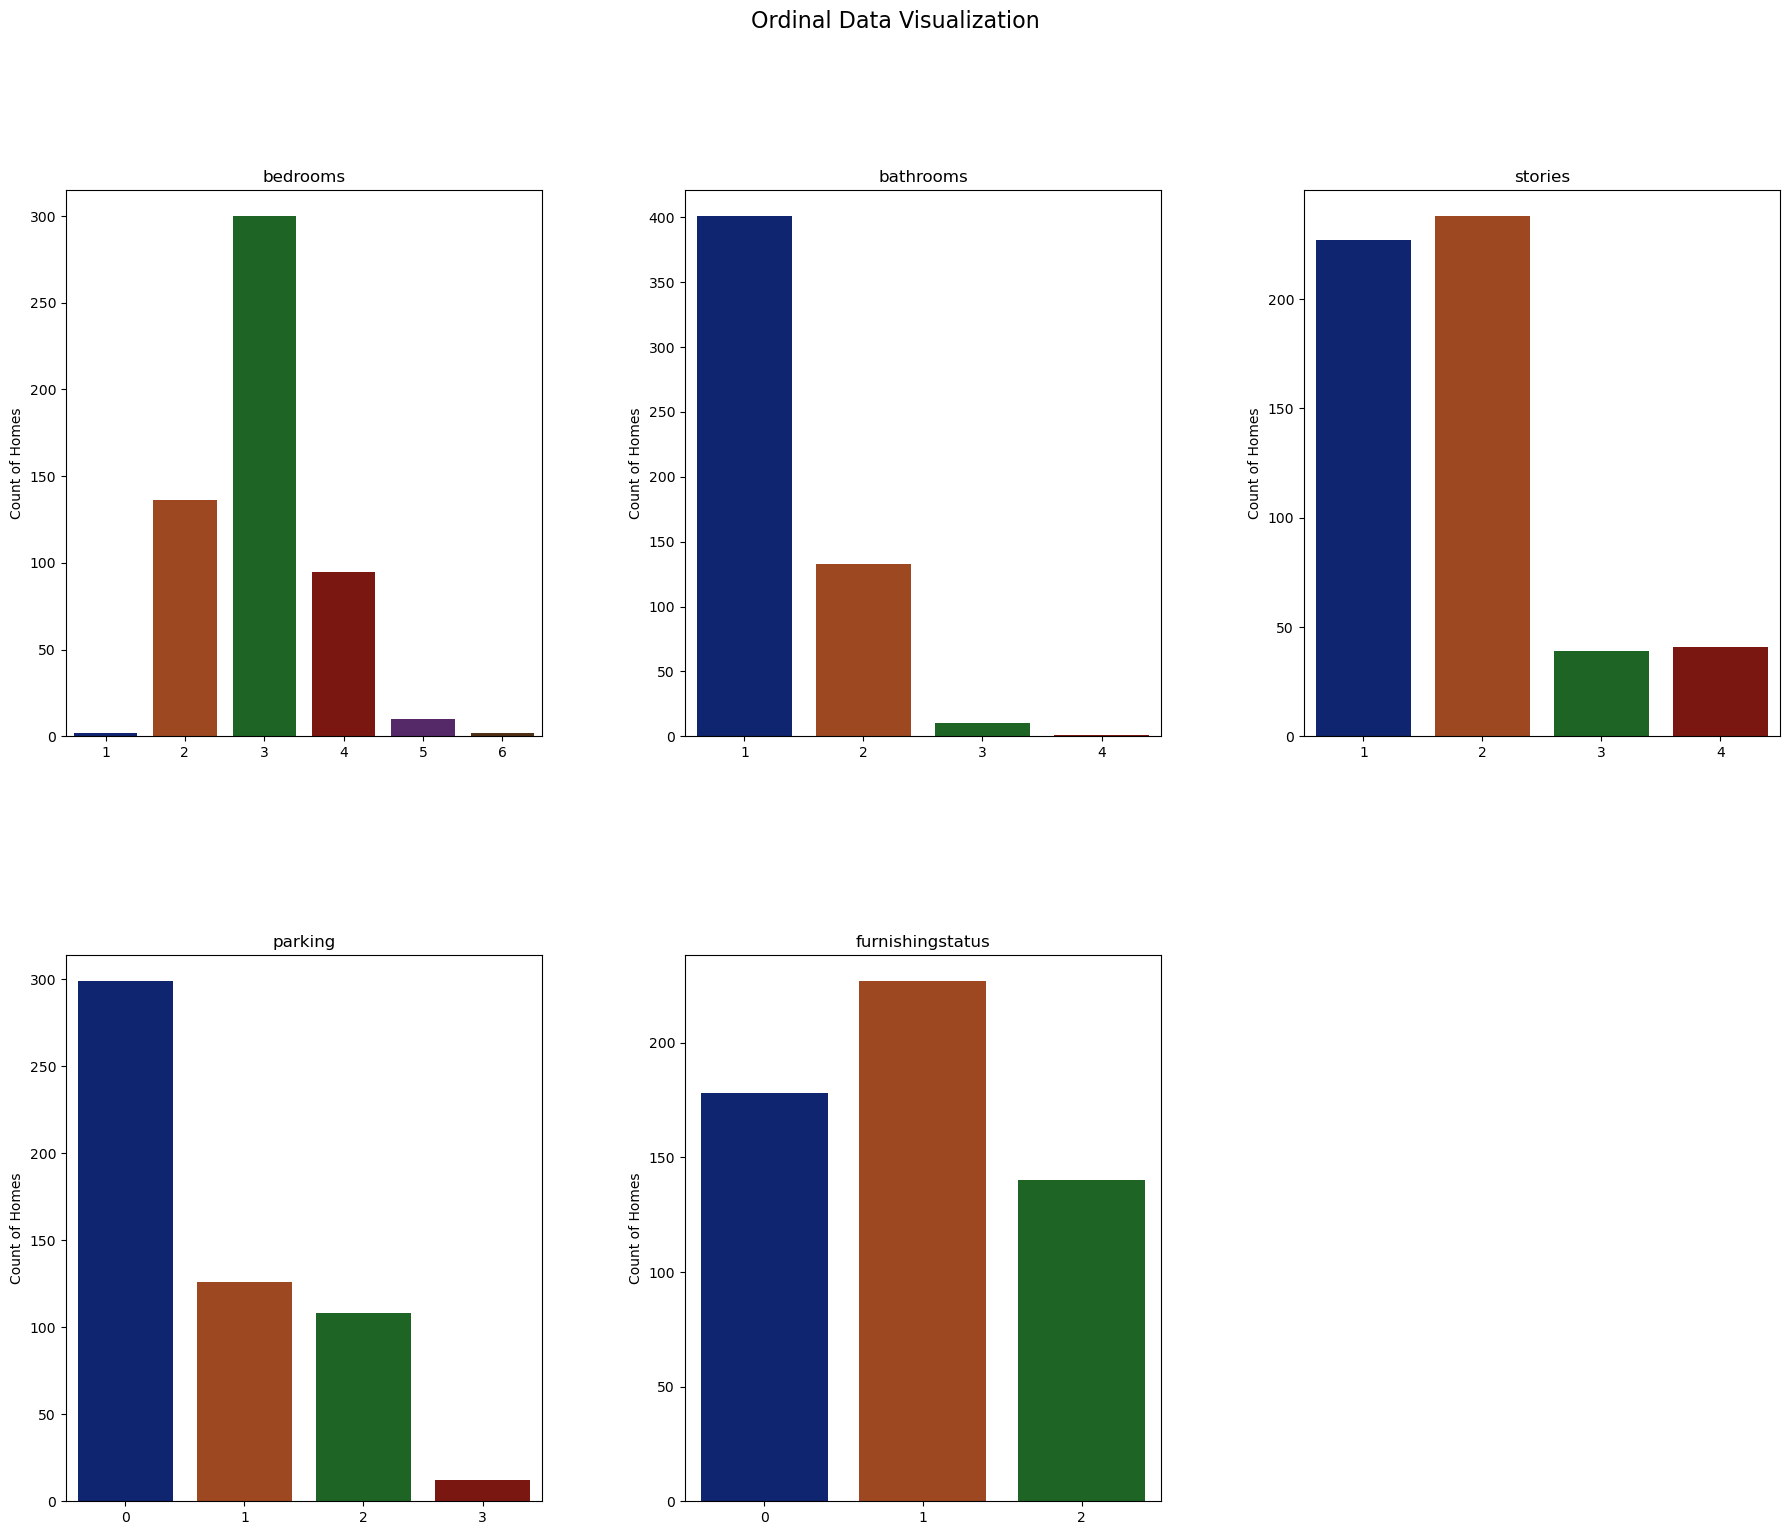

In [16]:
# ordinal data (data that has a meaningful order or ranking)

# determine the layout for subplots
n_cols = 3  # Set the number of columns to spread the charts horizontally
n_rows = (len(ordinal_data.columns) + n_cols - 1) // n_cols  # calculate number of rows needed

# create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 15))  # increase figure size for clarity
fig.suptitle('Ordinal Data Visualization', fontsize=16, y=1.02)

# flatten the axes array for easy iteration
axes = axes.flatten()

# loop through each selected column and plot in the grid
for i, column in enumerate(ordinal_data.columns):
    sns.countplot(data=housing_dataset, x=column, ax=axes[i], palette="dark")
    # set labels for each plot
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count of Homes')
    axes[i].set_title(column)

# remove any empty subplots if columns < n_cols * n_rows
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])  # delete unused axes

# adjust layout to prevent overlap and add space between plots
plt.tight_layout()
fig.subplots_adjust(top=0.9, hspace=0.4, wspace=0.3)  # adjust spacing between rows and columns
plt.show()

#### Based on the visualizations created for the ordinal features, we have came to the following conclusions:

 - Most of the homes have 3 bedrooms. Following this, the most common amount of bedrooms found within the homes are 2 and 4 bedrooms
 - Majority of the homes have only 1 bathroom. Following this, the next most common amount of bathrooms is 2
 - Majority of the homes are 2 or 1 story homes, with a couple having 3 or 4 stories
 - Majority of the homes lack parking, while some have 1 or 2 spots of parking
 - While most homes are semi-furnished, there is a good mix of homes that are unfurnished, semi-furnished, or furnished



 #### The next analysis we're performing is of the "area" variable. As this variable is a quantitative variable, we've separated the analysis.

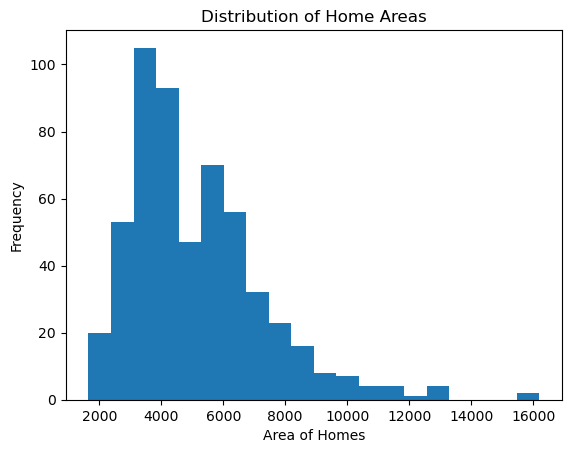

In [17]:
# visualizing area of the homes

plt.hist(housing_dataset['area'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Area of Homes')
plt.ylabel('Frequency')
plt.title('Distribution of Home Areas')
plt.show()

#### Based on the area of all the homes, we've found that majority of the homes are in the region of ~4000 square feet. Past this size, the frequency of homes decreases.

#### The next analysis we're performing is the correlation between each variable. Doing so allows us to see if any variables are highly correlated with each other, which could be beneficial when we begin our model creation.

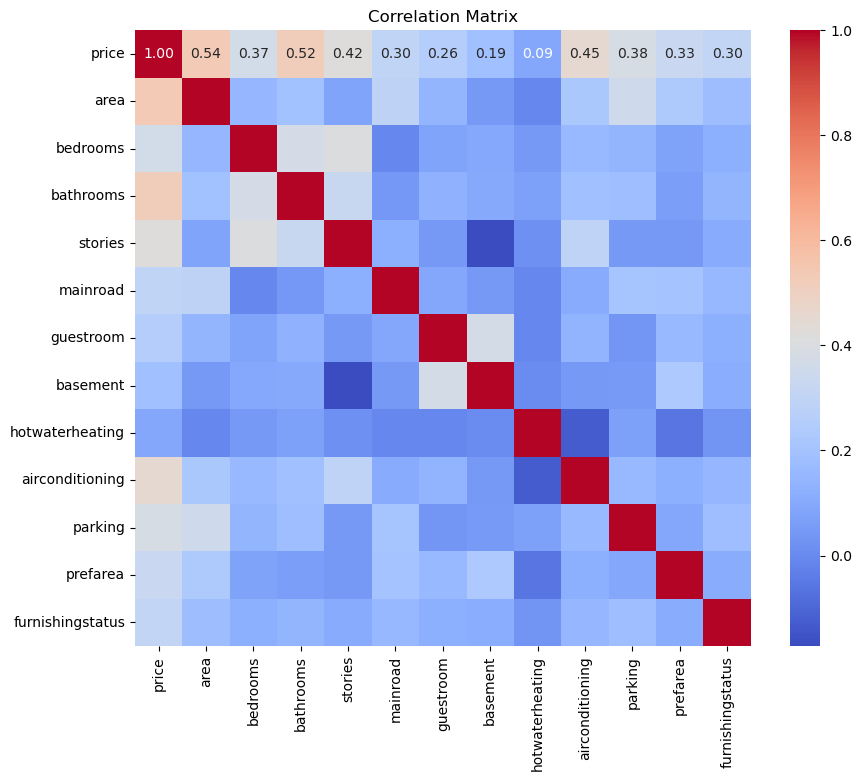

In [18]:
# correlation matrix

corr_matrix = housing_dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

#### As seen in the correlation matrix, majority of variables

# 3. Model Selection

#### We will begin our model selection process by splitting the dataset into training and testing sets.

### 1. Linear Regression

In [21]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Define the feature set (X) and target variable (y)
X = housing_dataset.drop('price', axis=1)  # Features (excluding the target)
y = housing_dataset['price']                # Target variable (price)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (436, 12)
Testing set shape: (109, 12)


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Load the dataset
housing_dataset = pd.read_csv("Housing.csv")

# Encode binary columns
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    housing_dataset[col] = housing_dataset[col].map({'yes': 1, 'no': 0})

# Ordinally encode 'furnishingstatus'
housing_dataset['furnishingstatus'] = housing_dataset['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})
# Separate features and target
X = housing_dataset.drop(columns=['price'])
y = housing_dataset['price']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = linear_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Display metrics
print("Linear Regression Results:")
print(f"R-squared: {r2:.2f}")

# Print R-squared as a percentage to represent model accuracy
accuracy_percentage = r2 * 100
print(f"Model Accuracy (R-squared as percentage): {accuracy_percentage:.2f}%")

Linear Regression Results:
R-squared: 0.65
Model Accuracy (R-squared as percentage): 64.95%


### 2. Decison Tree

In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Load the dataset
housing_dataset = pd.read_csv("Housing.csv")

# Encode binary columns
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    housing_dataset[col] = housing_dataset[col].map({'yes': 1, 'no': 0})

# Ordinally encode 'furnishingstatus'
housing_dataset['furnishingstatus'] = housing_dataset['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

# Separate features and target
X = housing_dataset.drop(columns=['price'])
y = housing_dataset['price']
# Split the data into training and testing sets
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display metrics
print("Decision Tree Regressor Results:")
print(f"R-squared: {r2:.2f}")
accuracy_percentage = r2 * 100
print(f"Model Accuracy (R-squared as percentage): {accuracy_percentage:.2f}%")


Decision Tree Regressor Results:
R-squared: 0.42
Model Accuracy (R-squared as percentage): 41.60%


### 3. Random Forest Regression 

In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load the dataset
housing_dataset = pd.read_csv("Housing.csv")

# Encode binary columns
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    housing_dataset[col] = housing_dataset[col].map({'yes': 1, 'no': 0})

# Ordinally encode 'furnishingstatus'
housing_dataset['furnishingstatus'] = housing_dataset['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

# Separate features and target
X = housing_dataset.drop(columns=['price'])
y = housing_dataset['price']
# Split the data into training and testing sets
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = forest_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display metrics
print("Random Forest Regressor Results:")
print(f"R-squared: {r2:.2f}")
print(f"Model Accuracy (R-squared as percentage): {accuracy_percentage:.2f}%")


Random Forest Regressor Results:
R-squared: 0.61
Model Accuracy (R-squared as percentage): 41.60%


### 4. XGBoost

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

# Load and preprocess the dataset
housing_dataset = pd.read_csv("Housing.csv")

# Encode categorical features
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    housing_dataset[col] = housing_dataset[col].map({'yes': 1, 'no': 0})

housing_dataset['furnishingstatus'] = housing_dataset['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

# Separate features and target
X = housing_dataset.drop(columns=['price'])
y = housing_dataset['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost regressor
xgboost_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost_model.fit(X_train, y_train)

# Predict on the test set and calculate R-squared
y_pred = xgboost_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print the R-squared and model accuracy
print("XGBoost:")
print(f"R-squared: {r2:.2f}")
print(f"Model Accuracy (R-squared as percentage): {r2 * 100:.2f}%")


XGBoost:
R-squared: 0.60
Model Accuracy (R-squared as percentage): 59.79%


#### Best Model Selection 

In [37]:
from prettytable import PrettyTable
from colorama import Fore, Style  # Import Fore and Style for colored text

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Dictionary to store results
results = {}

# Train each model and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    results[name] = r2

# Create a PrettyTable for results
table = PrettyTable()
table.field_names = ["Model", "R-squared", "Accuracy (%)"]

# Add rows to the table
for name, r2 in results.items():
    table.add_row([name, f"{r2:.2f}", f"{r2 * 100:.2f}%"])

# Print the table with results
print(Fore.GREEN + str(table) + Style.RESET_ALL)

# Identify the best model based on R-squared
best_model_name = max(results, key=results.get)
best_model_r2 = results[best_model_name]

print(Fore.CYAN + f"The best model is {best_model_name} with an Accuracy of {best_model_r2*100:.2f}%." + Style.RESET_ALL)

+-------------------+-----------+--------------+
|       Model       | R-squared | Accuracy (%) |
+-------------------+-----------+--------------+
| Linear Regression |    0.65   |    64.95%    |
|   Decision Tree   |    0.42   |    41.60%    |
|   Random Forest   |    0.61   |    61.28%    |
|      XGBoost      |    0.60   |    59.79%    |
+-------------------+-----------+--------------+
The best model is Linear Regression with an Accuracy of 64.95%.
